Saving bt.jpg to bt (1).jpg


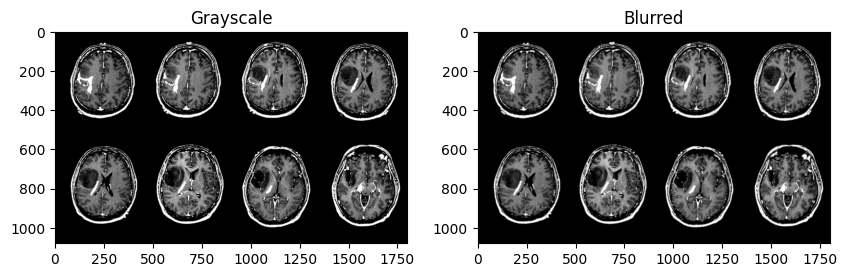

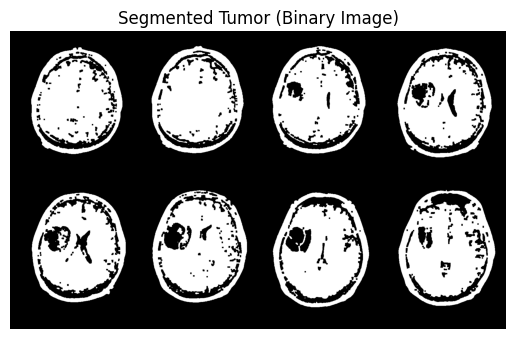

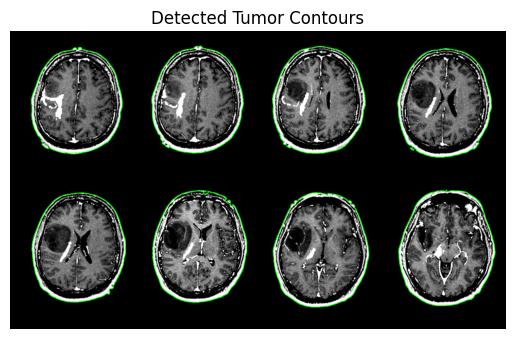

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
# Read the image
image = cv2.imread(list(uploaded.keys())[0])

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Show the image
plt.figure(figsize=(10,4))
plt.subplot(1,2,1), plt.imshow(gray, cmap='gray'), plt.title("Grayscale")
plt.subplot(1,2,2), plt.imshow(blurred, cmap='gray'), plt.title("Blurred")
plt.show()
# Apply thresholding
_, thresh = cv2.threshold(blurred, 45, 255, cv2.THRESH_BINARY)

# Perform Morphological operations
kernel = np.ones((5,5), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Show result
plt.imshow(closing, cmap='gray')
plt.title("Segmented Tumor (Binary Image)")
plt.axis('off')
plt.show()
contours, _ = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on original image
output = image.copy()
cv2.drawContours(output, contours, -1, (0,255,0), 2)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Detected Tumor Contours")
plt.axis('off')
plt.show()
